In [1]:
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20, 16)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
data_path = '../data/CALC_STRAIGHT_CLEAN/'
files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

In [3]:
print('STRAIGHT SEGMENTS:\t'+ str(len(files)))

STRAIGHT SEGMENTS:	311


In [4]:
A = pd.read_csv('../data/STRAIGHT_STEP_FREQ_CLEAN.csv')
A.head()

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,CadL,CadR,MaxDir,MinDir,MeanDir,StdDir,Type
0,N-01-1-Char00part2seg-9_sub_0.csv,58127.0,59961.0,12.0,13.0,0.008,1835.0,14.680,0.817439,0.885559,1.223333,1.129231,-65.195771,-134.512166,-80.112084,6.818842,N
1,A-615829-Char00part1seg-4_sub_1.csv,37215.0,37836.0,3.0,2.0,0.008,622.0,4.976,0.602894,0.401929,1.658667,2.488000,151.185526,17.011236,90.361148,31.200162,A
2,N-25031996-Char00part3seg-2_sub_0.csv,24585.0,26738.0,14.0,14.0,0.008,2154.0,17.232,0.812442,0.812442,1.230857,1.230857,115.613353,-117.315695,-74.752300,12.243346,N
3,A-766012-Char00part1seg-1_sub_5.csv,5114.0,6533.0,11.0,10.0,0.017,1420.0,24.140,0.455675,0.414250,2.194545,2.414000,31.103251,-71.406641,-20.846895,20.233188,A
4,N-740516-Char00part3seg-0_sub_0.csv,7316.0,8149.0,13.0,12.0,0.017,834.0,14.178,0.916914,0.846382,1.090615,1.181500,-35.739444,-136.718920,-108.459980,16.910178,N


In [5]:
text_file = open('../data/JointNamesCalc.txt', "r")
joint_names_calc = text_file.read().split('\n')
len(joint_names_calc)

61

In [6]:
spine_joints = ['Spine3','Spine2','Spine1','Spine','Hips']
spine_joints_ind = np.zeros([len(spine_joints),1])
cc = 0
for c in spine_joints:
    spine_joints_ind[cc] = joint_names_calc.index(c) + 1
    cc+=1
spine_joints_ind

array([[18.],
       [19.],
       [20.],
       [21.],
       [ 1.]])

In [7]:
def euclidean(df):
    N = np.size(df,axis=0)
    dist = np.zeros((N-1))
    for n in range(1,N):
        dist[n-1] = ((df.iloc[n,0]-df.iloc[n-1,0])**2+(df.iloc[n,1]-df.iloc[n-1,1])**2+(df.iloc[n,2]-df.iloc[n-1,2])**2)**(1/2)
    return dist
        

In [8]:
def XY_len(df):
    return ((df.iloc[-1,0]-df.iloc[0,0])**2+(df.iloc[-1,1]-df.iloc[0,1])**2)**(1/2)

In [9]:
def mean_xyz(df):
    avg = pd.DataFrame()
    for dim in ['x','y','z']:
        dim_cols = [s for s in df.columns.to_list() if dim in s]
        dim_df = df.filter(dim_cols,axis=1)
        avg[dim] = np.mean(dim_df,axis=1)
    return avg

In [10]:
def module(joint):
    N = np.size(joint,axis=0)
    module = np.zeros((N))
    for n in range(0,N):
        module[n] = ((joint.iloc[n,0])**2+(joint.iloc[n,1])**2+(joint.iloc[n,2])**2)**(1/2)
    return module

In [11]:
def projection(point,plane):
    x1, y1, z1 = point
    a, b, c, d = plane
    t = (-a * x1 - b * y1 - c * z1 - d) / (a * a + b * b + c * c);  
    x2 = a * t + x1;  
    y2 = b * t + y1;  
    z2 = c * t + z1; 
    proj = x2, y2, z2
    return proj

A-03-1-Char00part4seg-0_sub_0.csv


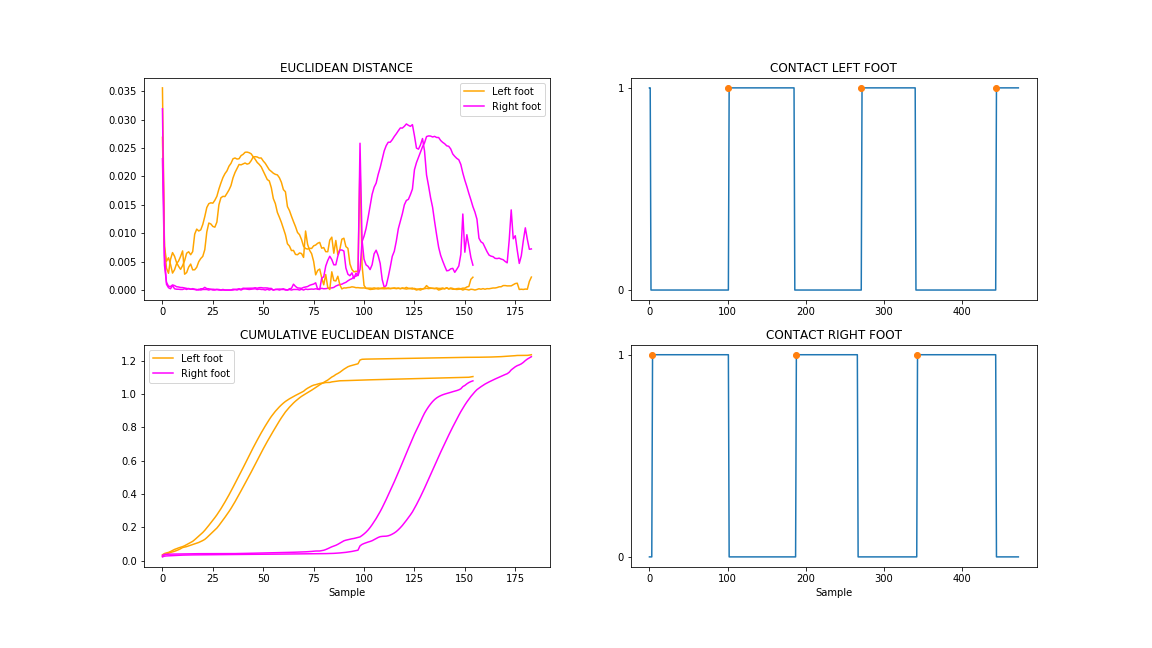

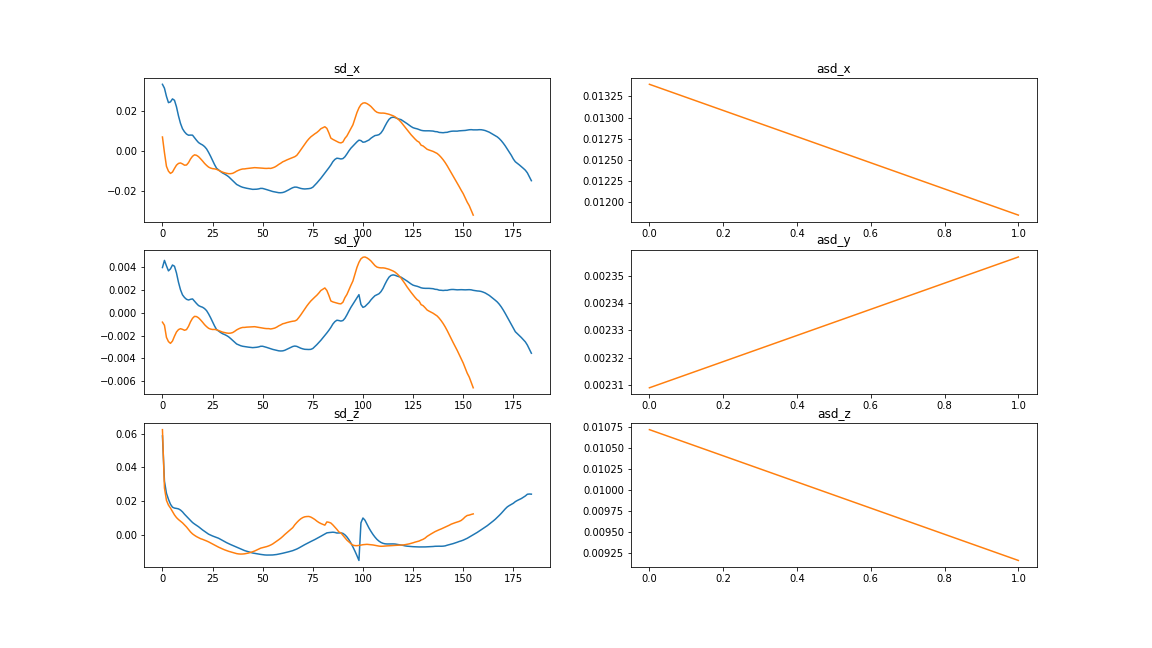

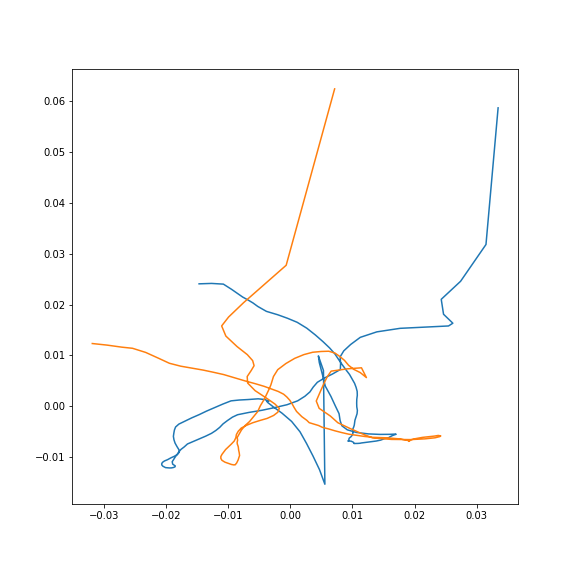

In [44]:
for file in files:
    file = 'A-03-1-Char00part4seg-0_sub_0.csv'
    
    step_len_L = np.empty(0)
    step_len_R = np.empty(0)

    XY_len_L = np.empty(0)
    XY_len_R = np.empty(0)
    
    rel_len_L = np.empty(0)
    rel_len_R = np.empty(0)
    
    sd = np.empty(0)
    sd_x = np.empty(0)
    sd_y = np.empty(0)
    sd_z = np.empty(0)
    
    asd_x = np.empty(0)
    asd_y = np.empty(0)
    asd_z = np.empty(0)

    print(file)
    
    df = pd.read_csv(data_path + file)
    position_cols = [s for s in df.columns.to_list() if "X" in s]
    xdf = df.filter(position_cols,axis=1)
    
    accel_cols = [s for s in df.columns.to_list() if "A" in s]
    adf = df.filter(accel_cols,axis=1)
    
    T_sampling = A.loc[A['File'] == file,'Ts'].values
           
    peaksL = np.where(np.diff(df.contactL_clean)>0)[0]
    peaksR = np.where(np.diff(df.contactR_clean)>0)[0]
    
    fig,ax = plt.subplots(2,2,figsize=(16,9))
    ax[0,1].plot(df.contactL_clean)
    ax[0,1].plot(peaksL,np.ones_like(peaksL),'o')
    ax[1,1].plot(df.contactR_clean)
    ax[1,1].plot(peaksR,np.ones_like(peaksR),'o')
    ax[0,1].set_title('CONTACT LEFT FOOT')
    ax[1,1].set_title('CONTACT RIGHT FOOT')
    ax[1,1].set_xlabel('Sample')
    ax[0,1].set_yticks(np.arange(2))
    ax[1,1].set_yticks(np.arange(2))
    
    
    if len(peaksL) < 3 or len(peaksR) < 3:
        continue
    
    if len(peaksL) > len(peaksR):
        steps = peaksL
    else:
        steps = peaksR
        
    # Exclude first and last step (before or after turn)
    start = steps[0]
    steps = steps[1:]
    end = steps[1]
    
    fig2,ax2 = plt.subplots(3,2,figsize=(16,9))
    fig31 = plt.figure(figsize=(8,8))
    ax31 = fig31.add_subplot(111)#, projection='3d')
    
    for step in steps:
        #print(step)
        end = step
        # select actual step
        x = xdf.loc[start:end,:] # position only
        X = df.loc[start:end,:]  # everything
        a = adf.loc[start:end,:]
        N = x.shape[0]
        
        accel_cols = a.columns.to_list()
        AA = pd.DataFrame()
        for joint in range(1,60):
            joint_cols = []
            for col in accel_cols:
                if str(joint) in col:
                    joint_cols.append(accel_cols.index(col))
            this_joint = a.filter(a.columns[joint_cols],axis=1)
            AA[str(joint)] = module(this_joint)

        # FOOTS
        leftleg_cols = []
        for col in x.columns.to_list():
            if '07' in col:
                leftleg_cols.append(x.columns.to_list().index(col))
        rightleg_cols = []
        for col in x.columns.to_list():
            if '04' in col:
                rightleg_cols.append(x.columns.to_list().index(col))
        foot_L_df = x.filter(x.columns[leftleg_cols],axis=1)
        foot_R_df = x.filter(x.columns[rightleg_cols],axis=1)
        
        # HANDS
        lefthand_cols = []
        for col in x.columns.to_list():
            if '15' in col:
                lefthand_cols.append(x.columns.to_list().index(col))
        righthand_cols = []
        for col in x.columns.to_list():
            if '11' in col:
                righthand_cols.append(x.columns.to_list().index(col))
        hand_L_df = x.filter(x.columns[lefthand_cols],axis=1)
        hand_R_df = x.filter(x.columns[righthand_cols],axis=1)
        
        # SPINE
        spine_cols = []
        for c in spine_joints_ind:
            for col in x.columns.to_list():
                if c<10:
                    name = '0' + str(int(c)) + '-'
                else:
                    name = str(int(c)) + '-'
                if col.startswith(name):
                    spine_cols.append(x.columns.to_list().index(col))
        spine_df = x.filter(x.columns[spine_cols],axis=1)
        
        COM = mean_xyz(spine_df)
        COMmod = module(COM)
        
        ######### STEP LENGTH ############
        
        distL = euclidean(foot_L_df)
        distR = euclidean(foot_R_df)
        
        step_len_L = np.append(step_len_L,np.sum(distL))
        step_len_R = np.append(step_len_R,np.sum(distR))
        
        XY_distL = XY_len(foot_L_df)
        XY_distR = XY_len(foot_R_df)
        
        XY_len_L = np.append(XY_len_L,XY_distL)
        XY_len_R = np.append(XY_len_R,XY_distR)
        
        rel_len_L = np.append(rel_len_L,step_len_L/XY_distL)
        rel_len_R = np.append(rel_len_R,step_len_R/XY_distR)
        
        
        ax[0,0].plot(distL,'orange')
        ax[0,0].plot(distR,'magenta')
        ax[0,0].set_title('EUCLIDEAN DISTANCE')
        ax[0,0].legend(('Left foot', 'Right foot'))

        ax[1,0].plot(np.cumsum(distL),'orange')
        ax[1,0].plot(np.cumsum(distR),'magenta')
        ax[1,0].set_title('CUMULATIVE EUCLIDEAN DISTANCE')
        ax[1,0].set_xlabel('Sample')
        ax[1,0].legend(('Left foot', 'Right foot'))
        
        
        
        ######### COM STANDARD DEVIATION ############
        
        # MOVEMENT VECTOR
        # One vector from regression of COM movement in this segment
        X = COM[['x', 'y', 'z']].values
        Xlen = X.shape[0]
        avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
        Xmean = X - avgPointCloud
        cov = 1 / Xlen * X.T.dot(Xmean)
        t = np.arange(-5, 5, 1)
        linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

        # normal vectors
        normal_coronal = linearReg[-1,:]-linearReg[0,:]

        # COMMON POINT - first COM position
        common_point = COM.iloc[0,:].values

        a_c, b_c, c_c = normal_coronal
        d_c = np.dot(normal_coronal,common_point)
        coronal = a_c, b_c, c_c, d_c

        c_proj = np.zeros((N,3))
        
        for i in range(0,N):
            c_proj[i,:] = projection(COM.iloc[i,:].values,coronal)
        
        # STANDARD DEVIATION FROM ORIGINAL AXIS
        sd = np.append(sd,np.std(COMmod))
        sd_x = np.append(sd_x,np.std(COM.x))
        sd_y = np.append(sd_y,np.std(COM.y))
        sd_z = np.append(sd_z,np.std(COM.z))
        
        # STANDARD DEVIATION FROM CORONAL PLANE
        c_proj = c_proj - np.mean(c_proj,axis=0)
        
        asd_x = np.append(asd_x,np.std(c_proj[:,0]))
        asd_y = np.append(asd_y,np.std(c_proj[:,1]))
        asd_z = np.append(asd_z,np.std(c_proj[:,2]))
        
        ######### % FREQUENCY IN FREQ BANDS ############
        # input A[joint -> module of acceleration], Tsampling, freq. bands
        # outpus F[joint -> % of energy in band]
        
        ######### 
        
        start = end
        
        ax2[0,0].plot(c_proj[:,0])
        ax2[0,0].set_title('sd_x')
        ax2[0,1].plot(asd_x)
        ax2[0,1].set_title('asd_x')
        ax2[1,0].plot(c_proj[:,1])
        ax2[1,0].set_title('sd_y')
        ax2[1,1].plot(asd_y)
        ax2[1,1].set_title('asd_y')
        ax2[2,0].plot(c_proj[:,2])
        ax2[2,0].set_title('sd_z')
        ax2[2,1].plot(asd_z)
        ax2[2,1].set_title('asd_z')
        
        ax31.plot(c_proj[:,0],c_proj[:,2])

    break

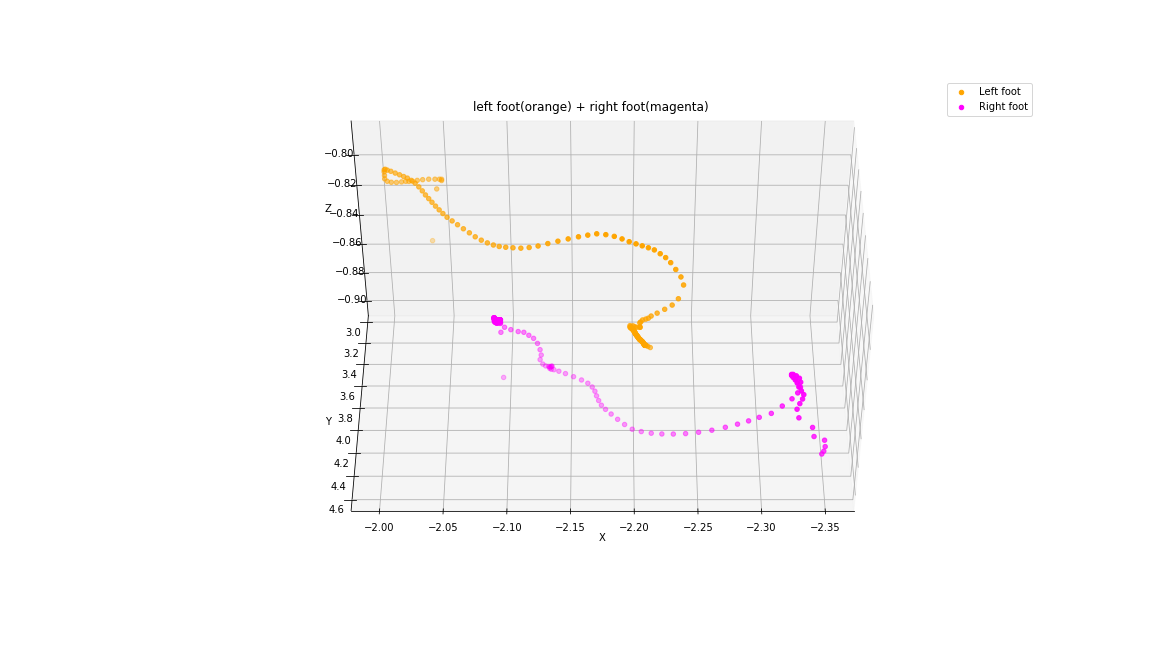

In [17]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

xxdf = x.filter(x.columns[leftleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()

ax.scatter(xs, ys, -zs, c='orange')

xxdf = x.filter(x.columns[rightleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()

ax.scatter(xs, ys, -zs, c='magenta')


ax.azim = 90
ax.elev = 45
ax.set_title('left foot(orange) + right foot(magenta)')
ax.legend(['Left foot','Right foot'])

plt.show()


In [18]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

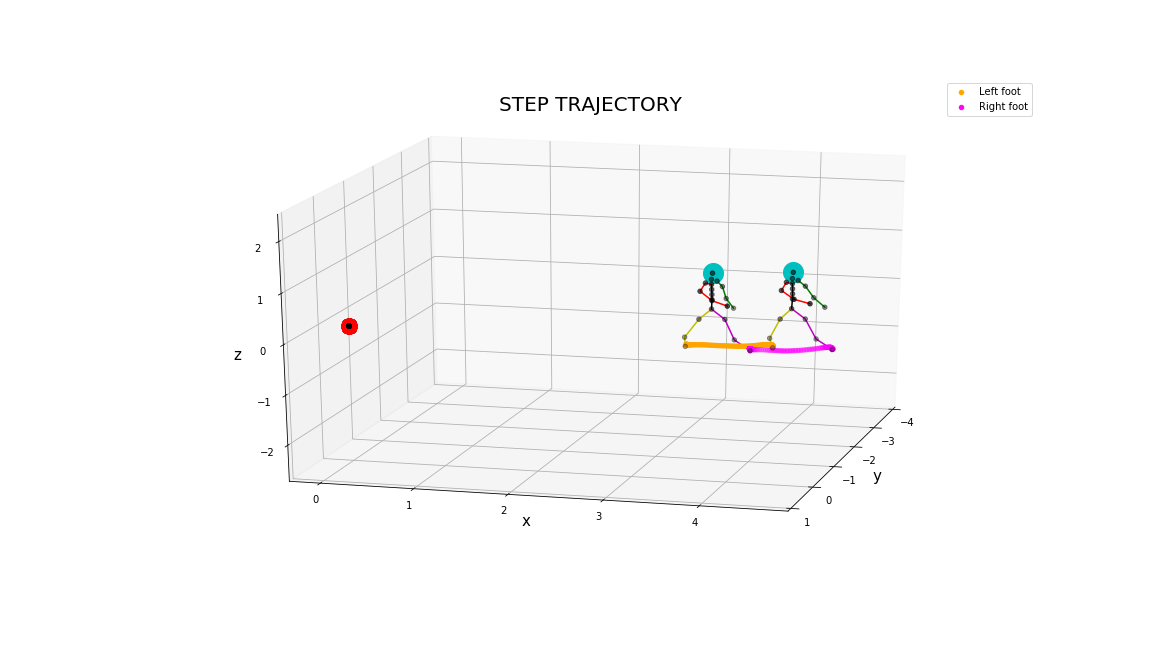

In [17]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# LEFT LEG TRAJECTORY
xxdf = x.filter(x.columns[leftleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()

ax.scatter(xs, ys, -zs, c='orange',label="Left foot")

# RIGHT LEG TRAJECTORY
xxdf = x.filter(x.columns[rightleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()

ax.scatter(xs, ys, -zs, c='magenta',label="Right foot")

# FIRST FRAME
xxdf = x.iloc[0:1,:]

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy().transpose()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy().transpose()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy().transpose()

ax.scatter(xs, ys, -zs,c='k')
vec = [0,1,2,3]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'m')
vec = [0,4,5,6]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'y')
vec = [17,7,8,9,10]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'g')
vec = [17,11,12,13,14]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'r')
vec = [15,16,17,18,19,20,0]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'k')

ax.plot(xs[15], ys[15], -zs[15],'co',markersize=20)

vec = range(21,59)
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'ro',markersize=15)

# LAST FRAME
xxdf = x.iloc[-2:-1,:]

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy().transpose()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy().transpose()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy().transpose()


ax.scatter(xs, ys, -zs,c='k')
vec = [0,1,2,3]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'m')
vec = [0,4,5,6]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'y')
vec = [17,7,8,9,10]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'g')
vec = [17,11,12,13,14]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'r')
vec = [15,16,17,18,19,20,0]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'k')

ax.plot(xs[15], ys[15], -zs[15],'co',markersize=20)

vec = range(21,59)
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'ro',markersize=15)


#ax.plot3D(xs[:,0], ys[:,0], -zs[:,0], 'magenta')

#ax.set_xlim(-0.5,-2.5)
#ax.set_ylim(2.75,4.75)
#ax.set_zlim(-1,1)

set_axes_equal(ax)
ax.azim = 15
ax.elev = 20
#plt.savefig('../Figures/Shot.eps', format='eps')
#plt.savefig('../Figures/Shot.png')
ax.set_xlabel('y', fontsize = 15)
ax.set_ylabel('x', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)
#ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.title('STEP TRAJECTORY', fontsize = 20)

#plt.tight_layout()
plt.savefig('../Figures/One/Trajectory.eps', format='eps',dpi=300)
plt.savefig('../Figures/One/Trajectory.png',dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

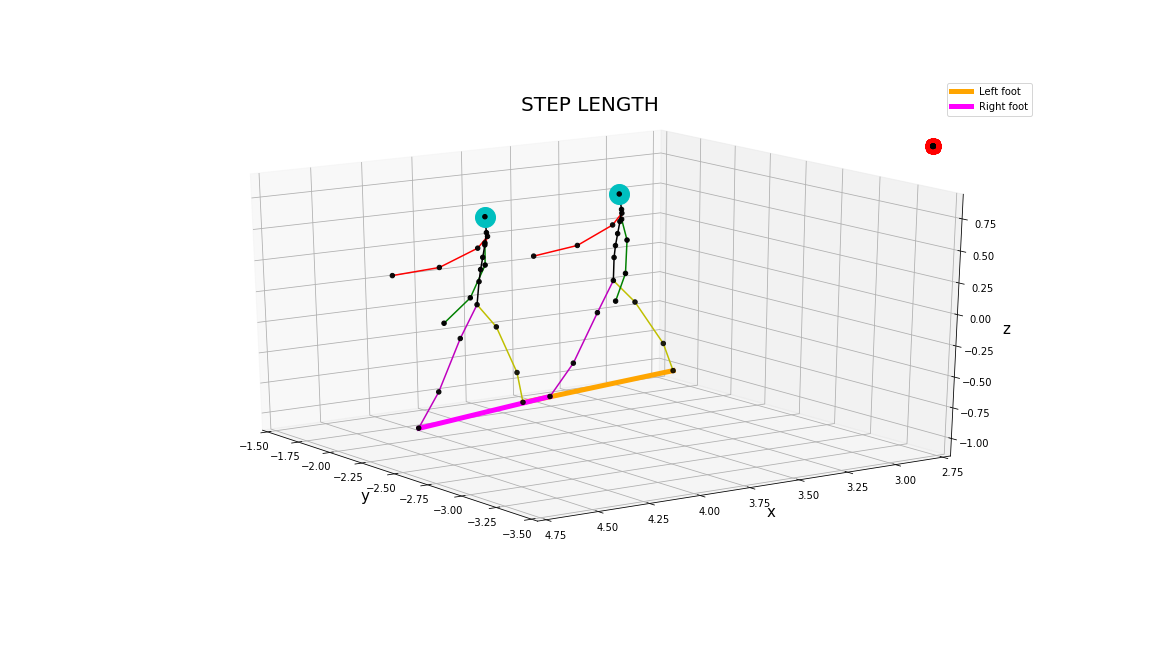

In [18]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# LEFT LEG XY
xxdf = x.filter(x.columns[leftleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()

ax.plot(xs, ys, -zs, c='orange',label="Left foot",linewidth=5)

# RIGHT LEG XY
xxdf = x.filter(x.columns[rightleg_cols],axis=1)

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy()[[0,-1],: ].flatten()

ax.plot(xs, ys, -zs, c='magenta',label="Right foot",linewidth=5)

# FIRST FRAME
xxdf = x.iloc[0:1,:]

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy().transpose()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy().transpose()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy().transpose()

ax.scatter(xs, ys, -zs,c='k')
vec = [0,1,2,3]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'m')
vec = [0,4,5,6]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'y')
vec = [17,7,8,9,10]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'g')
vec = [17,11,12,13,14]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'r')
vec = [15,16,17,18,19,20,0]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'k')

ax.plot(xs[15], ys[15], -zs[15],'co',markersize=20)

vec = range(21,59)
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'ro',markersize=15)

# LAST FRAME
xxdf = x.iloc[-2:-1,:]

xdim_cols = [s for s in xxdf if "x" in s]
ydim_cols = [s for s in xxdf if "y" in s]
zdim_cols = [s for s in xxdf if "z" in s]

xs = xxdf.filter(xdim_cols,axis=1).to_numpy().transpose()
ys = xxdf.filter(ydim_cols,axis=1).to_numpy().transpose()
zs = xxdf.filter(zdim_cols,axis=1).to_numpy().transpose()


ax.scatter(xs, ys, -zs,c='k')
vec = [0,1,2,3]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'m')
vec = [0,4,5,6]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'y')
vec = [17,7,8,9,10]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'g')
vec = [17,11,12,13,14]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'r')
vec = [15,16,17,18,19,20,0]
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'k')

ax.plot(xs[15], ys[15], -zs[15],'co',markersize=20)

vec = range(21,59)
ax.plot(xs[vec,0], ys[vec,0], -zs[vec,0],'ro',markersize=15)


#ax.plot3D(xs[:,0], ys[:,0], -zs[:,0], 'magenta')

plt.xlim(-1.5,-3.5)
plt.ylim(2.75,4.75)
ax.azim = 145
ax.elev = 20
#plt.savefig('../Figures/Shot.eps', format='eps')
#plt.savefig('../Figures/Shot.png')
ax.set_xlabel('y', fontsize = 15)
ax.set_ylabel('x', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)
#ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.title('STEP LENGTH', fontsize = 20)

set_axes_equal(ax)
#plt.tight_layout()
plt.savefig('../Figures/One/StepLength.eps', format='eps',dpi=300)
plt.savefig('../Figures/One/StepLength.png',dpi=300)